In [1]:
%matplotlib widget

## Extract features

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5-cleaned.csv"

data = mkit.read_data(path)
data.head()

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76


#### Extract features from preprocessed data for each animal: Distance, Average Speed, Average Acceleration, Direction, Stopped, Turning angle

In [3]:
# Extract additional features from the preprocessed movement data: Distance traveled between two timestamps, average speed between two timestamps (average distance in one unit of time), average acceleration between two timestamps, direction of the mover, whether the mover stopped at time stamp, and the turning angle of the mover at time stamp.
# mkit.extract_features(data, fps=10, stop_threshold=0.5)

#Parameters:
# data: pandas DataFrame with all records of movements.
# fps: integer to specify frames per second, the number of previous distance records which are considered when calculating the average speed: average speed = mean(distance traveled of the last fps timestamps).
# stop_threshold: integer to specify threshold for average speed, such that mover is considered to make a "stop".

data_features = mkit.extract_features(data, fps = 10, stop_threshold = 0.2)
data_features

Extracting all absolute features: 100%|██████████| 100.0/100 [00:00<00:00, 240.15it/s]


,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,turning
0,1,312,405.29,417.76,0.000000,0.210217,-0.018039,0.000000,0,0.000000
1,2,312,405.31,417.37,0.390512,0.192177,-0.018039,0.028158,1,0.028158
2,3,312,405.31,417.07,0.300000,0.174723,-0.018039,0.020590,1,-0.007567
3,4,312,405.30,416.86,0.210238,0.159133,-0.018039,0.013716,1,-0.006875
4,5,312,405.29,416.71,0.150333,0.155506,-0.018039,0.009600,1,-0.004116
...,...,...,...,...,...,...,...,...,...,...
4995,996,905,669.18,173.24,3.128003,2.946173,0.009090,0.162126,0,0.021831
4996,997,905,671.22,176.02,3.448188,3.002631,0.051180,0.180001,0,0.017875
4997,998,905,673.38,178.90,3.600000,3.109687,0.079591,0.184032,0,0.004031
4998,999,905,675.59,181.86,3.694009,3.247530,0.100520,0.187807,0,0.003775


#### Computing distances between movers and between timestamps

Calculate the euclidean distance between different movers

In [4]:
mkit.euclidean_dist(data)

Computing euclidean distance: 100%|██████████| 1000/1000 [00:02<00:00, 341.38it/s]


,time,animal_id,x,y,312,511,607,811,905
0,1,312,405.29,417.76,0.000000,36.980135,19.097081,40.282651,51.913321
1,1,511,369.99,428.78,36.980135,0.000000,30.621360,77.023446,23.313629
2,1,607,390.33,405.89,19.097081,30.621360,0.000000,55.152832,51.894988
3,1,811,445.15,411.94,40.282651,77.023446,55.152832,0.000000,88.548634
4,1,905,366.06,451.76,51.913321,23.313629,51.894988,88.548634,0.000000
...,...,...,...,...,...,...,...,...,...
4995,1000,312,720.96,244.60,0.000000,61.509642,51.770954,75.437726,73.481324
4996,1000,511,662.56,225.29,61.509642,0.000000,93.117875,129.431823,43.068319
4997,1000,607,722.75,296.34,51.770954,93.117875,0.000000,41.259047,119.983706
4998,1000,811,762.44,307.61,75.437726,129.431823,41.259047,0.000000,148.883426


Compute the distance between positions for a particular time window for all movers.

In [5]:
mkit.distance_by_time(data, 3, 5)

,animal_id,distance
0,312,0.660571
1,511,0.060000
2,607,0.271176
3,811,1.392829
4,905,0.390000


#### Computing centroids and medoids for each time stamp

In [6]:
#Calculates the data point (animal_id) closest to center/centroid/medoid for each time step.
mkit.centroid_medoid_computation(data, object_output = True)

Calculating centroid distances: 100%|██████████| 1000/1000 [00:05<00:00, 173.54it/s]


,time,animal_id,x,y,x_centroid,y_centroid,medoid,distance_to_centroid,centroid
0,1,312,405.29,417.76,395.364,423.226,312,11.331,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
1,2,312,405.31,417.37,395.382,423.220,312,11.523,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
2,3,312,405.31,417.07,395.392,423.234,312,11.677,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
3,4,312,405.30,416.86,395.396,423.272,312,11.798,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
4,5,312,405.29,416.71,395.394,423.324,312,11.903,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
...,...,...,...,...,...,...,...,...,...
4995,996,905,669.18,173.24,704.316,245.136,312,80.022,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
4996,997,905,671.22,176.02,705.554,246.824,312,78.689,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
4997,998,905,673.38,178.90,706.816,248.458,312,77.177,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"
4998,999,905,675.59,181.86,708.058,250.102,312,75.572,"ST_MakePoint(:ST_MakePoint_1, :ST_MakePoint_2)"


#### Exploring the geospatial features and plotting the data

One possibility is to plot the movement from all movers/animals in the DataFrame.

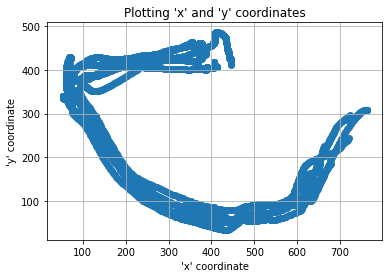

In [7]:
# plot movement from all movers/animals in a specified time period
mkit.plot_movement(data, frm=0, to=1000)

Another option is to plot each individual mover/animal individually.

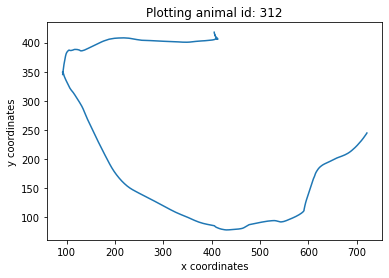

In [8]:
mkit.plot_animal(data, 312)

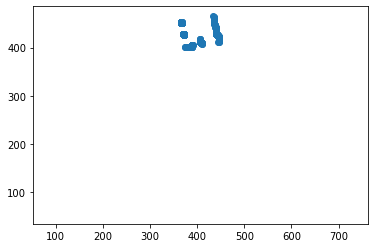

In [16]:
# animate the data
anim = mkit.animate_movement(data, 100)
writergif = animation.PillowWriter(fps=30) 
#anim.save('mover.gif', writer=writergif)

One can also plot either the average acceleration or the average speed for each individual mover/animal over time.

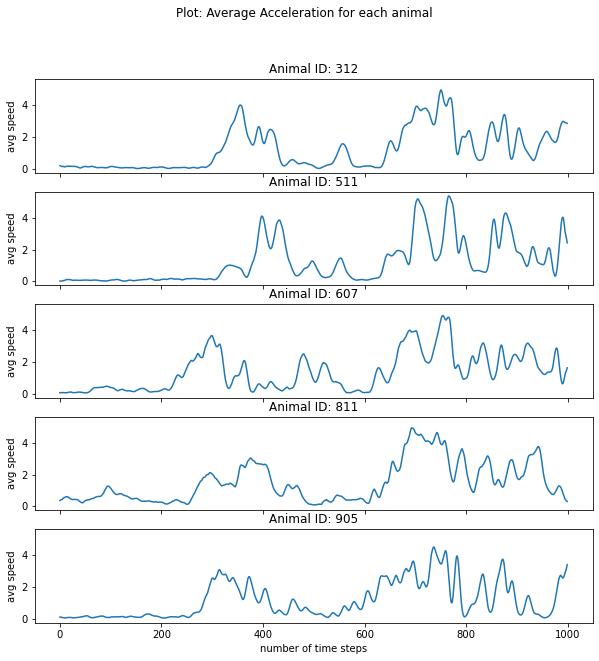

In [9]:
mkit.plot_pace(data_features, "speed")

One can additionally check the geospatial distribution of the different movers.

Calculating covered areas:  33%|███▎      | 33.333333333333336/100 [00:00<00:00, 301.58it/s]


Area (polygon) covered by animal ID = 312 is = 139873.97 sq. units


Area (polygon) covered by animal ID = 511 is = 151556.80 sq. units


Area (polygon) covered by animal ID = 607 is = 171971.54 sq. units


Area (polygon) covered by animal ID = 811 is = 196394.24 sq. units


Area (polygon) covered by animal ID = 905 is = 151805.74 sq. units


Area (polygon) covered by animals collectively is =  214704.49029999992 sq. units


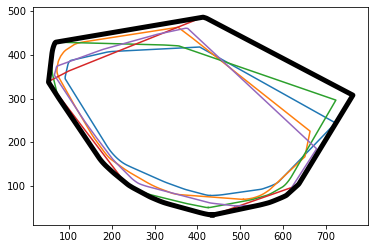

/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Calculating covered areas: 100%|██████████| 100.00000000000001/100 [00:00<00:00, 258.07it/s]


In [18]:
#Show exploration of environment space by each animal. Gives singular descriptions of polygon area covered by each animal and combined.
#Additionally a plot of the respective areas is provided.
# mkit.explore_features_geospatial(data)

#Parameters:
#data: DataFrame, containing preprocessed movement records.

mkit.explore_features_geospatial(data)

## Time series analysis

Possible parameters to extract time series features are: 

- *absolute_sum_of_changes(x)*	Returns the sum over the absolute value of consecutive changes in the series x
- *agg_autocorrelation(x, param)*	Calculates the value of an aggregation function f_{agg} 
- *agg_linear_trend(x, param)*	Calculates a linear least-squares regression for values of the time series that were aggregated over chunks versus the sequence from 0 up to the number of chunks minus one.
- *approximate_entropy(x, m, r)*	Implements a vectorized Approximate entropy algorithm.
- *ar_coefficient(x, param)*	This feature calculator fits the unconditional maximum likelihood of an autoregressive AR(k) process.
- *augmented_dickey_fuller(x, param)*	The Augmented Dickey-Fuller test is a hypothesis test which checks whether a unit root is present in a time series sample.
- *autocorrelation(x, lag)*	Calculates the autocorrelation of the specified lag, according to the formula [1]
- *has_duplicate(x)*	Checks if any value in x occurs more than once
- *kurtosis(x)*	Returns the kurtosis of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G2).
- *large_standard_deviation(x, r)*	Boolean variable denoting if the standard dev of x is higher than ‘r’ times the range = difference between max and min of x.
- *last_location_of_maximum(x)*	Returns the relative last location of the maximum value of x.
- *length(x)*	Returns the length of x
- *linear_trend(x, param)*	Calculate a linear least-squares regression for the values of the time series versus the sequence from 0 to length of the time series minus one.
- *maximum(x)*	Calculates the highest value of the time series x.
- *mean(x)*	Returns the mean of x
- *median(x)*	Returns the median of x
- *minimum(x)*	Calculates the lowest value of the time series x.
- *number_crossing_m(x, m)*	Calculates the number of crossings of x on m.
- *number_cwt_peaks(x, n)*	This feature calculator searches for different peaks in x.
- *number_peaks(x, n)*	Calculates the number of peaks of at least support n in the time series x.
- *partial_autocorrelation(x, param)*	Calculates the value of the partial autocorrelation function at the given lag.
- *quantile(x, q)*	Calculates the q quantile of x.
- *range_count(x, min, max)*	Count observed values within the interval [min, max].
- *sample_entropy(x)*	Calculate and return sample entropy of x.
- *set_property(key, value)*	This method returns a decorator that sets the property key of the function to value
- *skewness(x)*	Returns the sample skewness of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G1).
- *standard_deviation(x)*	Returns the standard deviation of x
- *sum_of_reoccurring_data_points(x)*	Returns the sum of all data points, that are present in the time series more than once.
- *sum_of_reoccurring_values(x)*	Returns the sum of all values, that are present in the time series more than once.
- *sum_values(x)*	Calculates the sum over the time series values
- *value_count(x, value)*	Count occurrences of value in time series x.
- *variance(x)*	Returns the variance of x

For all possible features to extract please refer to https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html.

In [19]:
#To extract a specific feature from the time series just put the feature name in the function call. The additional parameters needed for the specific feature are inserted automatically by the function.
#For example autocorrelation
#mkit.ts_feature(data, feature)

auto_corr = mkit.ts_feature(data_features, 'autocorrelation')
auto_corr

Feature Extraction: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]


,average_acceleration__autocorrelation__lag_0,average_acceleration__autocorrelation__lag_1,average_acceleration__autocorrelation__lag_2,average_acceleration__autocorrelation__lag_3,average_acceleration__autocorrelation__lag_4,average_acceleration__autocorrelation__lag_5,average_acceleration__autocorrelation__lag_6,average_acceleration__autocorrelation__lag_7,average_acceleration__autocorrelation__lag_8,average_acceleration__autocorrelation__lag_9,...,y__autocorrelation__lag_0,y__autocorrelation__lag_1,y__autocorrelation__lag_2,y__autocorrelation__lag_3,y__autocorrelation__lag_4,y__autocorrelation__lag_5,y__autocorrelation__lag_6,y__autocorrelation__lag_7,y__autocorrelation__lag_8,y__autocorrelation__lag_9
312,1.0,0.973668,0.903444,0.794881,0.657631,0.500651,0.332216,0.163979,0.004965,-0.134738,...,1.0,1.000433,1.000799,1.001097,1.001328,1.001492,1.001589,1.001619,1.001585,1.001487
511,1.0,0.972424,0.903822,0.801623,0.675507,0.533283,0.382753,0.232857,0.090447,-0.036410,...,1.0,1.000432,1.000795,1.001090,1.001316,1.001472,1.001556,1.001568,1.001507,1.001375
607,1.0,0.968219,0.889871,0.775182,0.637952,0.490478,0.339138,0.194008,0.063611,-0.042827,...,1.0,1.000653,1.001235,1.001747,1.002191,1.002566,1.002874,1.003116,1.003293,1.003406
811,1.0,0.959034,0.876176,0.763834,0.635188,0.503375,0.365420,0.227693,0.100381,-0.008999,...,1.0,1.000724,1.001366,1.001928,1.002409,1.002810,1.003132,1.003375,1.003540,1.003628
905,1.0,0.964907,0.870206,0.726151,0.547323,0.349837,0.148240,-0.042027,-0.207605,-0.338054,...,1.0,1.000210,1.000370,1.000482,1.000546,1.000563,1.000537,1.000469,1.000361,1.000215


__Extract all possible time series features__ 

In [20]:
#mkit.ts_all_features(data)
#Note that function columnwise replaces all NaNs and infs from the time series results with average/extreme values from the same columns. For more information see https://tsfresh.readthedocs.io/en/v0.5.0/api/tsfresh.utilities.html .

ts_features = mkit.ts_all_features(data_features)
ts_features

Feature Extraction: 100%|██████████| 9/9 [00:30<00:00,  3.43s/it]
/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['turning__query_similarity_count__query_None__threshold_0.0'
 'x__query_similarity_count__query_None__threshold_0.0'
 'y__query_similarity_count__query_None__threshold_0.0'
 'average_acceleration__query_similarity_count__query_None__threshold_0.0'
 'average_speed__query_similarity_count__query_None__threshold_0.0'
 'direction__query_similarity_count__query_None__threshold_0.0'
 'distance__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,turning__variance_larger_than_standard_deviation,turning__has_duplicate_max,turning__has_duplicate_min,turning__has_duplicate,turning__sum_values,turning__abs_energy,turning__mean_abs_change,turning__mean_change,turning__mean_second_derivative_central,turning__median,...,distance__permutation_entropy__dimension_6__tau_1,distance__permutation_entropy__dimension_7__tau_1,distance__query_similarity_count__query_None__threshold_0.0,"distance__matrix_profile__feature_""min""__threshold_0.98","distance__matrix_profile__feature_""max""__threshold_0.98","distance__matrix_profile__feature_""mean""__threshold_0.98","distance__matrix_profile__feature_""median""__threshold_0.98","distance__matrix_profile__feature_""25""__threshold_0.98","distance__matrix_profile__feature_""75""__threshold_0.98",distance__mean_n_absolute_max__number_of_maxima_7
312,0.0,0.0,0.0,1.0,0.001955,0.000044,0.000124,5.491732e-09,-2.646510e-07,0.000004,...,4.552744,5.153861,0.0,2.424424,10.368385,6.428906,6.061785,4.893105,8.329089,5.141784
511,0.0,0.0,0.0,1.0,0.001856,0.000080,0.000129,-1.867557e-07,4.644715e-09,0.000002,...,4.550446,5.160369,0.0,1.608737,9.560575,4.402903,3.702528,2.593091,6.365235,5.600553
607,0.0,0.0,0.0,0.0,0.001110,0.000059,0.000150,1.127220e-07,-5.928628e-08,0.000001,...,4.250439,4.918822,0.0,1.803152,8.261652,3.685940,3.680112,2.786459,4.417432,5.216763
811,0.0,0.0,0.0,0.0,0.000191,0.000075,0.000181,7.243056e-08,3.656827e-08,-0.000004,...,4.871424,5.586094,0.0,1.525412,7.275725,3.918884,3.886348,3.085988,4.900854,5.052743
905,0.0,0.0,0.0,0.0,0.003525,0.000066,0.000135,2.477487e-07,-4.293020e-08,-0.000003,...,4.235639,4.863876,0.0,1.529394,8.000601,4.259319,4.081086,3.478502,4.963320,4.796128
